In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import geopandas as gpd
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray
import pyproj

In [2]:
# Read the shapefile and transform to EPSG:4269
shape_path_filename = r"..\..\Dataset\HRs\i03_Hydrologic_Regions.shp"
hrs = gpd.read_file(shape_path_filename).to_crs("EPSG:4326")
filepath =r"../../Outputs/all_regions_1yr_percentile/CA_percentile.nc"
ds_1yr = xr.open_dataset(filepath)

filepath =r"../../Outputs/all_regions_2yr_percentile/CA_percentile.nc"
ds_2yr = xr.open_dataset(filepath)
filepath =r"../../Outputs/all_regions_3yr_percentile/CA_percentile.nc"
ds_3yr = xr.open_dataset(filepath)

# Extract longitude, latitude, and data values
lon = ds_1yr.lon.values
lat = ds_1yr.lat.values
dates = ds_1yr.date.values


variable_to_plot_1yr = ds_1yr.percentile.values
variable_to_plot_2yr = ds_2yr.percentile.values
variable_to_plot_3yr = ds_3yr.percentile.values

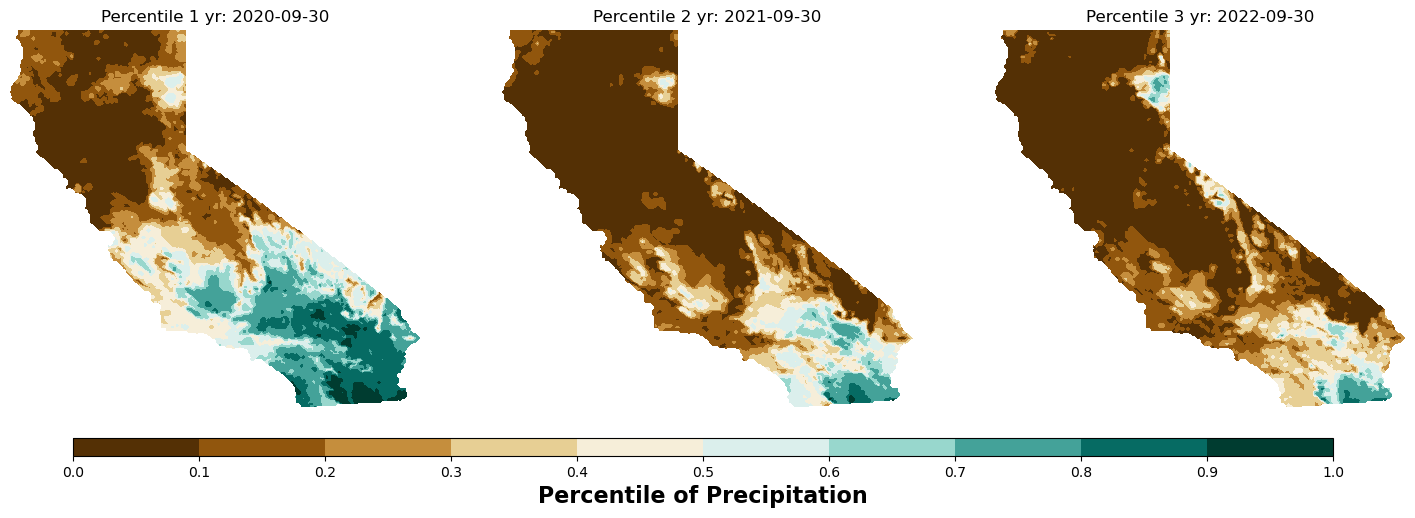

<Figure size 640x480 with 0 Axes>

In [16]:
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Define the indices for the slices
indices = [368, 416, 428]
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 3 subplots

# Configure the colorbar scale to be between 0 and 1
cmap = plt.get_cmap('BrBG')
num_colors = 10
colors = [cmap(i / (num_colors - 1)) for i in range(num_colors)]
# colors[4] = colors[3] 
# colors[6] = colors[5] 

custom_cmap = ListedColormap(colors)
levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Plot on the first subplot
img = axs[0].contourf(lon, lat, variable_to_plot_1yr[:, :, indices[0]], cmap=custom_cmap, levels=levels)
dates = ds_1yr.date.values
axs[0].set_title(f'Percentile 1 yr: {dates[indices[0]]}')
axs[0].set_aspect('equal')


# Plot on the second subplot
axs[1].contourf(lon, lat, variable_to_plot_2yr[:, :, indices[1]], cmap=custom_cmap, levels=levels)
dates = ds_2yr.date.values
dates = np.datetime_as_string(dates, unit='D')
axs[1].set_title(f'Percentile 2 yr: {dates[indices[1]]}')
axs[1].set_aspect('equal')

# Plot on the third subplot
axs[2].contourf(lon, lat, variable_to_plot_3yr[:, :, indices[2]], cmap=custom_cmap, levels=levels)
dates = ds_3yr.date.values
dates = np.datetime_as_string(dates, unit='D')
axs[2].set_title(f'Percentile 3 yr: {dates[indices[2]]}')
axs[2].set_aspect('equal')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    
cbar_ax = fig.add_axes([0.16, 0.1, 0.7, 0.03])  # Adjust the position and size as needed
# cbar = plt.colorbar(img, ax=axs[0], orientation='horizontal', shrink=0.8, ticks=[0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0], cax=cbar_ax)
cbar = plt.colorbar(img, ax=axs[0], orientation='horizontal', shrink=0.8, ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], cax=cbar_ax)
cbar.set_label('Percentile of Precipitation', fontsize=16, weight='bold')

# fig.suptitle('Percentage of Average Precipitation')
plt.show()
plt.tight_layout()

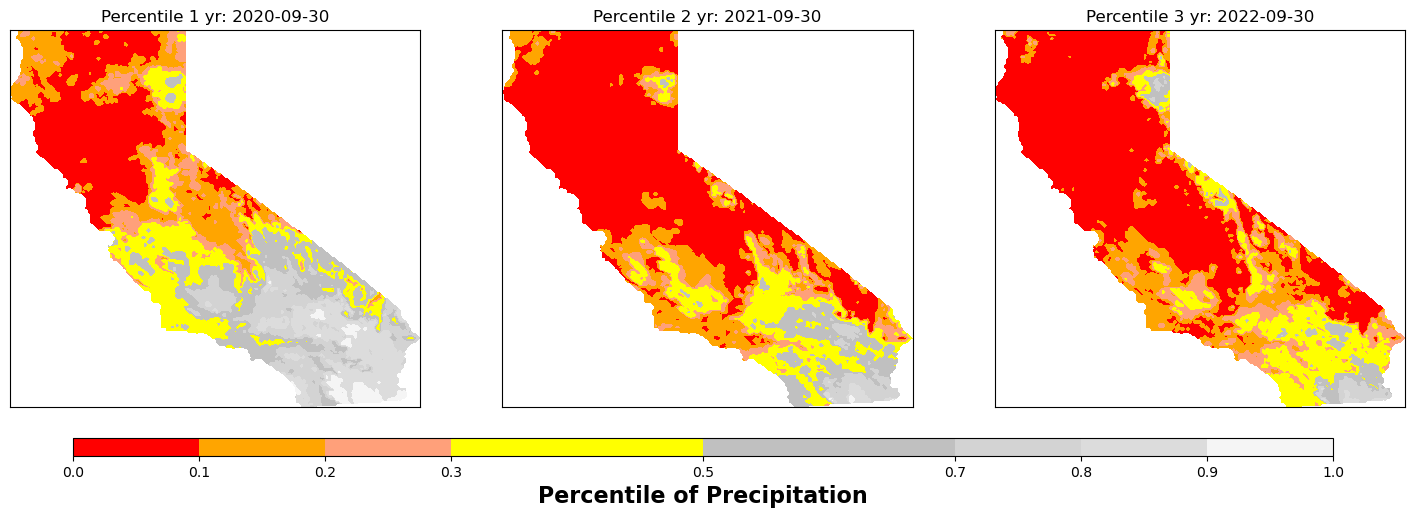

<Figure size 640x480 with 0 Axes>

In [17]:
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Define the indices for the slices
indices = [368, 416, 428]
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 3 subplots

# Configure the colorbar scale to be between 0 and 1
colors = ['red', 'orange', 'lightsalmon', 'yellow', 'yellow', 'silver', 'silver', 'lightgrey','gainsboro', 'whitesmoke']

custom_cmap = ListedColormap(colors)
levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Plot on the first subplot
img = axs[0].contourf(lon, lat, variable_to_plot_1yr[:, :, indices[0]], cmap=custom_cmap, levels=levels)
dates = ds_1yr.date.values
axs[0].set_title(f'Percentile 1 yr: {dates[indices[0]]}')
axs[0].set_aspect('equal')


# Plot on the second subplot
axs[1].contourf(lon, lat, variable_to_plot_2yr[:, :, indices[1]], cmap=custom_cmap, levels=levels)
dates = ds_2yr.date.values
dates = np.datetime_as_string(dates, unit='D')
axs[1].set_title(f'Percentile 2 yr: {dates[indices[1]]}')
axs[1].set_aspect('equal')

# Plot on the third subplot
axs[2].contourf(lon, lat, variable_to_plot_3yr[:, :, indices[2]], cmap=custom_cmap, levels=levels)
dates = ds_3yr.date.values
dates = np.datetime_as_string(dates, unit='D')
axs[2].set_title(f'Percentile 3 yr: {dates[indices[2]]}')
axs[2].set_aspect('equal')

for ax in axs:
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    
cbar_ax = fig.add_axes([0.16, 0.1, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=axs[0], orientation='horizontal', shrink=0.8, ticks=[0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0], cax=cbar_ax)
cbar.set_label('Percentile of Precipitation', fontsize=16, weight='bold')

# fig.suptitle('Percentage of Average Precipitation')
plt.show()
plt.tight_layout()

# This is converting crs to EPSG:3310 - NAD83 / California Albers

In [18]:
def process_dataset(ds: xr.Dataset, variables_to_keep: list, input_crs: str = "EPSG:4326", output_crs: str = "EPSG:3310") -> xr.Dataset:
    """
    Filters and reprojects an xarray.Dataset.

    This function retains only specified variables in the dataset, applies the input CRS, renames dimensions,
    transposes dimensions, and reprojects the dataset to the desired CRS.

    Parameters:
    - ds (xarray.Dataset): The input dataset to be processed.
    - variables_to_keep (list of str): A list of variable names to retain in the dataset.
    - input_crs (str): The CRS code of the input dataset. Defaults to "EPSG:4326".
    - output_crs (str): The desired CRS code for the output dataset. Defaults to "EPSG:3310".

    Returns:
    - xarray.Dataset: The processed dataset with the specified variables, reprojected to the desired CRS.
    """
    ds_filtered = ds.drop_vars([var for var in ds.data_vars if var not in variables_to_keep])
    ds_filtered = ds_filtered.rio.write_crs(input_crs)
    ds_filtered = ds_filtered.rename({'lat': 'y', 'lon': 'x'})
    ds_filtered = ds_filtered.transpose('date', 'y', 'x')
    ds_processed = ds_filtered.rio.reproject(output_crs)
    return ds_processed

variables_to_keep = ['precipitation_amount', 'value_period', 'percentile']
ds_1yr = process_dataset(ds_1yr, variables_to_keep)
ds_2yr = process_dataset(ds_2yr, variables_to_keep)
ds_3yr = process_dataset(ds_3yr, variables_to_keep)


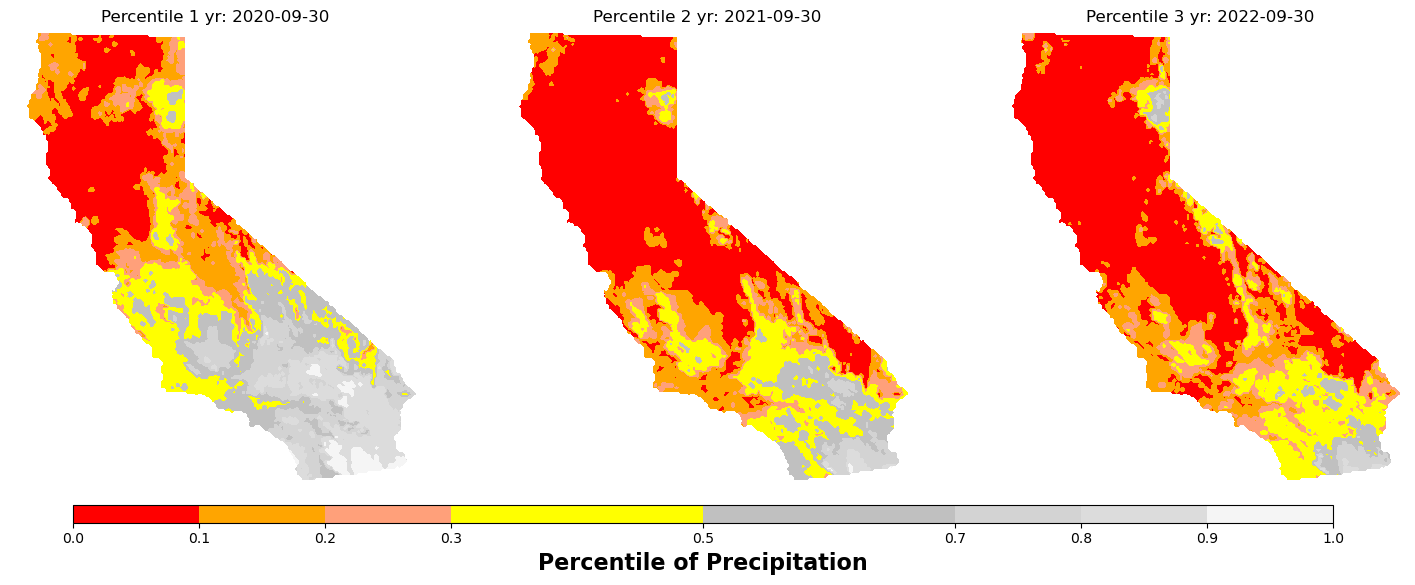

<Figure size 640x480 with 0 Axes>

In [24]:
# Extract longitude, latitude, and data values
lon = ds_1yr.x.values
lat = ds_1yr.y.values
dates = ds_1yr.date.values


variable_to_plot_1yr = ds_1yr.percentile.values
variable_to_plot_2yr = ds_2yr.percentile.values
variable_to_plot_3yr = ds_3yr.percentile.values

lon_grid, lat_grid = np.meshgrid(lon, lat)

# Define the indices for the slices
indices = [368, 416, 428]
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 3 subplots

# Configure the colorbar scale to be between 0 and 1
colors = ['red', 'orange', 'lightsalmon', 'yellow', 'yellow', 'silver', 'silver', 'lightgrey','gainsboro', 'whitesmoke']

custom_cmap = ListedColormap(colors)
levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Plot on the first subplot
img = axs[0].contourf(lon, lat, variable_to_plot_1yr[indices[0], :, :], cmap=custom_cmap, levels=levels)
dates = ds_1yr.date.values
axs[0].set_title(f'Percentile 1 yr: {dates[indices[0]]}')
axs[0].set_aspect('equal')


# Plot on the second subplot
axs[1].contourf(lon, lat, variable_to_plot_2yr[indices[1], :, :], cmap=custom_cmap, levels=levels)
dates = ds_2yr.date.values
dates = np.datetime_as_string(dates, unit='D')
axs[1].set_title(f'Percentile 2 yr: {dates[indices[1]]}')
axs[1].set_aspect('equal')

# Plot on the third subplot
axs[2].contourf(lon, lat, variable_to_plot_3yr[indices[2], :, :], cmap=custom_cmap, levels=levels)
dates = ds_3yr.date.values
dates = np.datetime_as_string(dates, unit='D')
axs[2].set_title(f'Percentile 3 yr: {dates[indices[2]]}')
axs[2].set_aspect('equal')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    
cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=axs[0], orientation='horizontal', shrink=0.8, ticks=[0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0], cax=cbar_ax)
cbar.set_label('Percentile of Precipitation', fontsize=16, weight='bold')

# fig.suptitle('Percentage of Average Precipitation')
plt.show()
plt.tight_layout()